# Jupiter Notebook 
## for training of simple classifiers and interpretability methods

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# load dataset into a pandas DataFrame
import pandas as pd
df = pd.read_csv("depression_detection_features.csv")
df.head()

,depression_label,frequency_of_speech,mean_length_of_speech,mean_word_length,flair_sentiment,flair_score,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,0,77,4.181818,4.068323,0,0.898453,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,0,72,19.430556,3.961401,1,0.830033,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,0,99,6.151515,4.096880,1,0.613937,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,0,94,20.382979,3.914927,1,0.989942,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,0,80,12.400000,4.021169,0,0.990270,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611


In [3]:
df.columns

Index(['depression_label', 'frequency_of_speech', 'mean_length_of_speech',
       'mean_word_length', 'flair_sentiment', 'flair_score',
       'average_frequency_nouns', 'average_frequency_verbs',
       'average_frequency_adjectives', 'average_frequency_adverbs',
       'average_frequency_firstperson', 'speech_speed', 'unique_word_count',
       'stop_word_frequency'],
      dtype='object')

In [4]:
# Check the total size of the dataset
df.shape

(219, 14)

In [5]:
# Check variable types
df.dtypes

depression_label                   int64
frequency_of_speech                int64
mean_length_of_speech            float64
mean_word_length                 float64
flair_sentiment                    int64
flair_score                      float64
average_frequency_nouns          float64
average_frequency_verbs          float64
average_frequency_adjectives     float64
average_frequency_adverbs        float64
average_frequency_firstperson    float64
speech_speed                     float64
unique_word_count                  int64
stop_word_frequency                int64
dtype: object

In [6]:
# Check for missing values
df.isnull().sum()

depression_label                 0
frequency_of_speech              0
mean_length_of_speech            0
mean_word_length                 0
flair_sentiment                  0
flair_score                      0
average_frequency_nouns          0
average_frequency_verbs          0
average_frequency_adjectives     0
average_frequency_adverbs        0
average_frequency_firstperson    0
speech_speed                     0
unique_word_count                0
stop_word_frequency              0
dtype: int64

# Checking for correlations

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

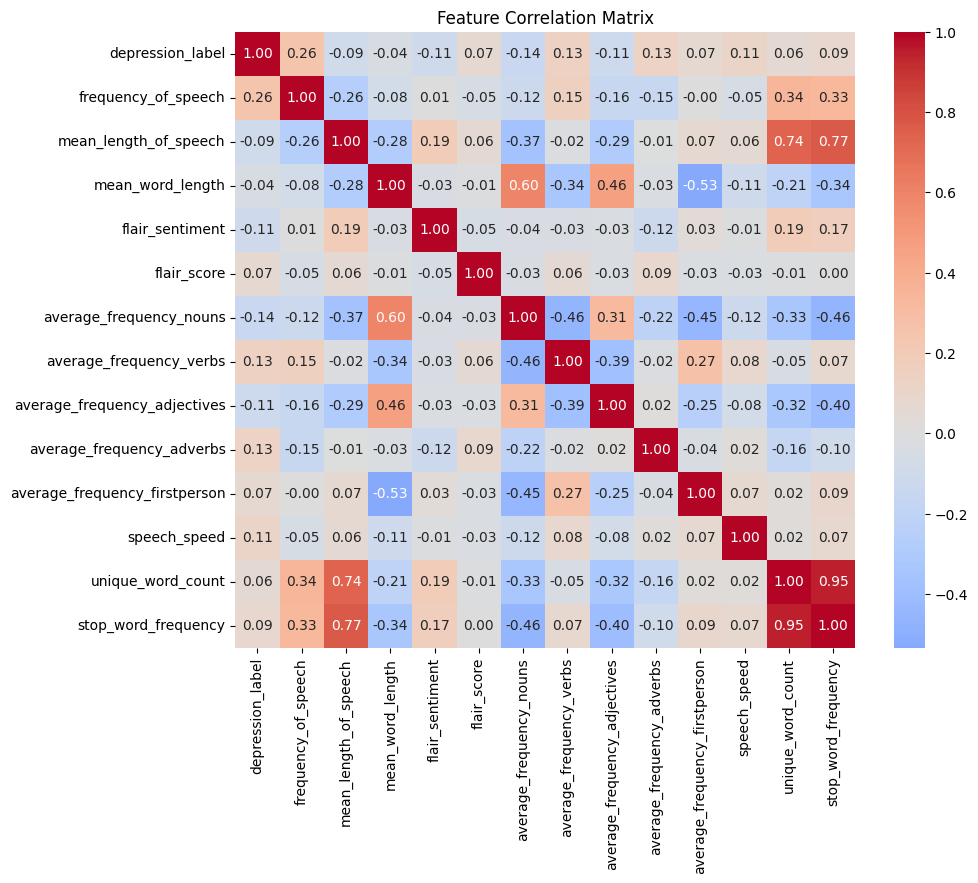

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Preparing the data for ML classification

Input features (all or a selection)
- frequency_of_speech
- mean_length_of_speech
- mean_word_length
- flair_sentiment
- flair_score
- average_frequency_nouns
- average_frequency_verbs
- average_frequency_adjectives
- average_frequency_adverbs
- average_frequency_firstperson
- speech_speed
- unique_word_count
- stop_word_frequency

Binary target class (could be changed, having different categories for depresion)
- depression_label (0 for no depression, 1 for depression)

In [9]:
import numpy as np

# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)

In [10]:
# Convert DataFrame to numpy array
numpy_array = df.values
print(numpy_array)

[[0.00000000e+00 7.70000000e+01 4.18181818e+00 ... 4.23795736e-01
  1.73000000e+02 1.74000000e+02]
 [0.00000000e+00 7.20000000e+01 1.94305556e+01 ... 1.05848528e+00
  3.64000000e+02 9.07000000e+02]
 [0.00000000e+00 9.90000000e+01 6.15151515e+00 ... 6.25064149e-01
  2.86000000e+02 3.30000000e+02]
 ...
 [0.00000000e+00 8.30000000e+01 5.61445783e+00 ... 2.70615563e+00
  2.15000000e+02 2.60000000e+02]
 [0.00000000e+00 9.70000000e+01 8.56701031e+00 ... 2.66859345e+00
  3.20000000e+02 4.97000000e+02]
 [0.00000000e+00 1.11000000e+02 6.09909910e+00 ... 6.65879807e-01
  2.70000000e+02 4.22000000e+02]]


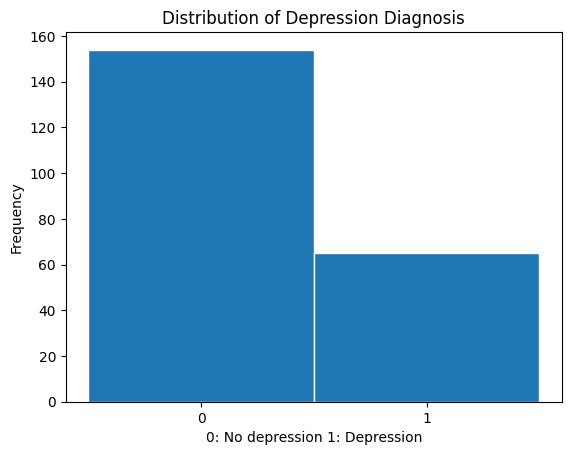

In [11]:
target_column = 'depression_label'

# Histogram for target class
plt.hist(df[target_column], bins=[-0.5, 0.5, 1.5], edgecolor='white')
plt.title('Distribution of Depression Diagnosis')
plt.xlabel('0: No depression 1: Depression')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Set x-ticks to show only 0 and 1
plt.show()

In [12]:
# Check for class imbalance
print(df[target_column].value_counts())

depression_label
0    154
1     65
Name: count, dtype: int64


In [13]:
# Code that separates data into features X and target variable y
X_array = df.drop([target_column], axis=1).values
y_array = df[target_column].values

### Stratified train-test partitioning
- generate X_train, X_test, y_train, y_test maintaining 20% in the test set
- additionally generate X_train_norm, X_test_norm for KNN and SVM classifier

*Explanation* of stratified train-test partitioning and its advantages:
- Stratified train-test partitioning involves splitting the dataset into train and test sets while maintaining the proportion of classes in each subset similar to that in the original dataset. 
- This is beneficial for datasets with unequal distribution ensuring both sets represent the class distribution accurately and improving model training and evaluation on minority classes.

In [14]:
from sklearn.model_selection import train_test_split

# Perform stratified train-test split with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X_array, 
                                                    y_array, 
                                                    test_size=0.2, 
                                                    stratify=y_array, 
                                                    random_state=RANDOM_SEED)

In [15]:
# Normalize the data for KNN and SVM

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Only the data with features is normalized, the class labels do not need normalization
X_array_normalized = scaler.fit_transform(X_array)

# Create splits from the normalized dataset.
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_array_normalized,
                                                              y_array,
                                                              test_size=0.2,
                                                              stratify=y_array, 
                                                              random_state=RANDOM_SEED)

### Model training

In [16]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


In [18]:
# Libraries for Cross-Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

In [19]:
# Define cross-validation with StratifiedKFold (ensuring consistent splits)
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [20]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

In [21]:
# Initialize an empty list to store results from all models
results_list = []

### XGBoost


In [22]:
pip install xgboost

In [23]:
import xgboost as xgb

In [24]:
# Calculate the ratio of the minority class to the majority class
class_counts = np.bincount(y_train)  # Count the occurrences of each class
majority_class_count = class_counts.max()  # Number of samples in the majority class
minority_class_count = class_counts.min()  # Number of samples in the minority class

# Calculate scale_pos_weight (ratio of minority class to majority class)
scale_pos_weight = majority_class_count / minority_class_count

In [25]:
df.columns

Index(['depression_label', 'frequency_of_speech', 'mean_length_of_speech',
       'mean_word_length', 'flair_sentiment', 'flair_score',
       'average_frequency_nouns', 'average_frequency_verbs',
       'average_frequency_adjectives', 'average_frequency_adverbs',
       'average_frequency_firstperson', 'speech_speed', 'unique_word_count',
       'stop_word_frequency'],
      dtype='object')

In [26]:
df_modified = df.drop(columns=["flair_sentiment", "average_frequency_verbs", "average_frequency_adverbs", "average_frequency_firstperson", "unique_word_count", "stop_word_frequency"])
df_modified.head()
df_modified.dtypes

depression_label                  int64
frequency_of_speech               int64
mean_length_of_speech           float64
mean_word_length                float64
flair_score                     float64
average_frequency_nouns         float64
average_frequency_adjectives    float64
speech_speed                    float64
dtype: object

In [27]:
X_array_1= df_modified.drop([target_column], axis = 1).values
y_array_1 = df_modified[target_column].values

In [28]:
from sklearn.model_selection import train_test_split

# Perform stratified train-test split with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X_array_1, 
                                                    y_array_1, 
                                                    test_size=0.2, 
                                                    stratify=y_array_1, 
                                                    random_state=RANDOM_SEED)

In [29]:
# Normalize the data for KNN and SVM

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Only the data with features is normalized, the class labels do not need normalization
X_array_1_normalized = scaler.fit_transform(X_array_1)

# Create splits from the normalized dataset.
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_array_1_normalized,
                                                              y_array_1,
                                                              test_size=0.2,
                                                              stratify=y_array_1, 
                                                              random_state=RANDOM_SEED)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [31]:
models_1 = {
    "DT_1": DecisionTreeClassifier(max_depth=3),
    "DT_2": DecisionTreeClassifier(max_depth=5),
    "RF_1": RandomForestClassifier(n_estimators=10, max_depth=3),
    "RF_2": RandomForestClassifier(n_estimators=100, max_depth=5),
    "KNN_1": KNeighborsClassifier(n_neighbors=3),
    "KNN_2": KNeighborsClassifier(n_neighbors=7),
    "SVM_1": SVC(kernel='rbf'),
    "SVM_2": SVC(kernel='linear'),
    "SVM_3": SVC(kernel='sigmoid'),
    "SVM_4": SVC(kernel='linear', class_weight= {0:2, 1:1}),
    "LR_1": LogisticRegression(),
    "LR_2": LogisticRegression(class_weight= "balanced"),
    "LR_3": LogisticRegression(class_weight= {0:2, 1:1})
}

# Iterate over the dictionary as follows:
for name, classifier in models_1.items():
    print("The name of the classifier is:", name, " and it is a sklearn object:", classifier)

The name of the classifier is: DT_1  and it is a sklearn object: DecisionTreeClassifier(max_depth=3)
The name of the classifier is: DT_2  and it is a sklearn object: DecisionTreeClassifier(max_depth=5)
The name of the classifier is: RF_1  and it is a sklearn object: RandomForestClassifier(max_depth=3, n_estimators=10)
The name of the classifier is: RF_2  and it is a sklearn object: RandomForestClassifier(max_depth=5)
The name of the classifier is: KNN_1  and it is a sklearn object: KNeighborsClassifier(n_neighbors=3)
The name of the classifier is: KNN_2  and it is a sklearn object: KNeighborsClassifier(n_neighbors=7)
The name of the classifier is: SVM_1  and it is a sklearn object: SVC()
The name of the classifier is: SVM_2  and it is a sklearn object: SVC(kernel='linear')
The name of the classifier is: SVM_3  and it is a sklearn object: SVC(kernel='sigmoid')
The name of the classifier is: SVM_4  and it is a sklearn object: SVC(class_weight={0: 2, 1: 1}, kernel='linear')
The name of th

In [32]:
import pandas as pd

In [33]:
# Individual performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Pandas dataframe to store results of each variable on the 10 classifiers
results_1 = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })

In [34]:
# Apply the classifier in each dataset
for name, classifier in models_1.items():

    # Start measuring the training time
    t_start = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier.fit(X_train_norm,y_train)
    # Stop measuring training time
    t_end = time.time()
    # Calculate Variable of interest `training_time`
    training_time = t_end - t_start
    #######

    # Start measuring the prediction time
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(X_test_norm)
    # Stop measuring prediction time
    t_end = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time = t_end - t_start
    #######


    # Get performance metrics
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted, zero_division=0)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
    #######


    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append to the main dataframe with the results
    results_1 = pd.concat([results_1, this_result], axis=0, ignore_index=True)

results_1

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT_1,0.006428,0.000000,0.659091,0.333333,0.153846,0.210526
1,DT_2,0.000000,0.000000,0.636364,0.285714,0.153846,0.200000
2,RF_1,0.020320,0.000000,0.704545,0.500000,0.153846,0.235294
3,RF_2,0.110530,0.000000,0.727273,0.666667,0.153846,0.250000
4,KNN_1,0.015611,0.006317,0.636364,0.363636,0.307692,0.333333
5,KNN_2,0.000000,0.000000,0.727273,0.571429,0.307692,0.400000
6,SVM_1,0.015482,0.000000,0.727273,1.000000,0.076923,0.142857
7,SVM_2,0.000000,0.000000,0.704545,0.000000,0.000000,0.000000
8,SVM_3,0.014438,0.000000,0.704545,0.000000,0.000000,0.000000
9,SVM_4,0.000000,0.000000,0.704545,0.000000,0.000000,0.000000


In [35]:
rf_model = models_1['RF_2']

In [36]:
!pip install shap

In [37]:
import shap

# Explainer initialization and SHAP values computation
explainer = shap.TreeExplainer(models_1['RF_2'])
shap_values = explainer.shap_values(X_test_norm)

# Check the shape of SHAP values and x_test_df
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of x_test: {X_test_norm.shape}")  # Feature matrix

c:\Users\shwet\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape of shap_values: (44, 7, 2)
Shape of x_test: (44, 7)


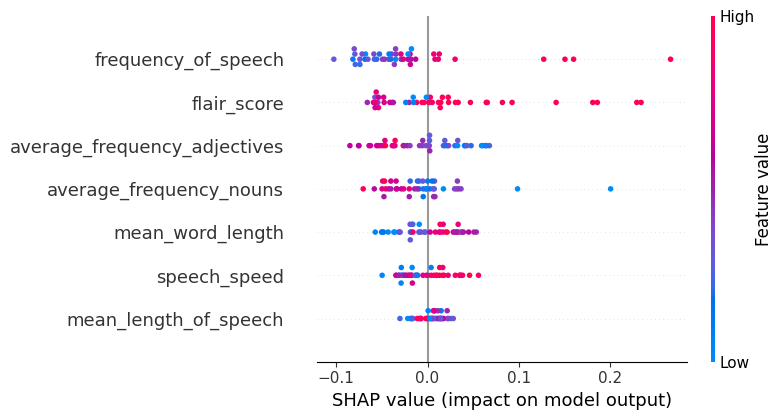

In [38]:
feat_names=list(df_modified.columns)[1:]

#Summary plot for class 1 (Depression)
shap.summary_plot(shap_values[:, :, 1], X_test_norm, feature_names=feat_names)

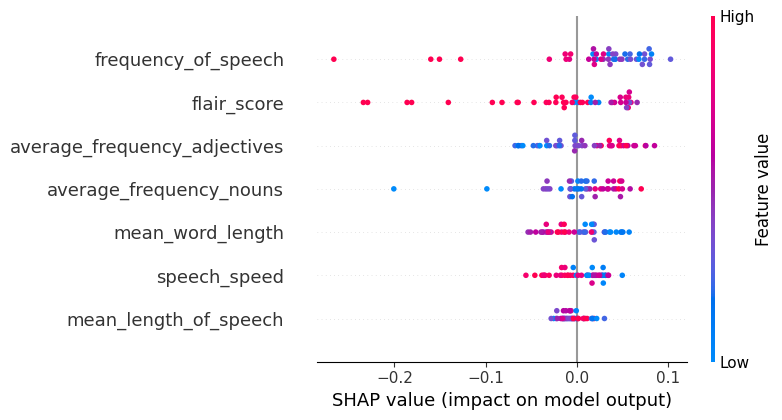

In [39]:
#Summary plot for class 0 (Low)
shap.summary_plot(shap_values[:, :, 0], X_test_norm, feature_names=feat_names)

In [40]:
df.head()

,depression_label,frequency_of_speech,mean_length_of_speech,mean_word_length,flair_sentiment,flair_score,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,0,77,4.181818,4.068323,0,0.898453,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,0,72,19.430556,3.961401,1,0.830033,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,0,99,6.151515,4.096880,1,0.613937,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,0,94,20.382979,3.914927,1,0.989942,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,0,80,12.400000,4.021169,0,0.990270,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611


In [41]:
df_modified_2=df.drop(columns=["flair_sentiment", "frequency_of_speech", "flair_score"])
df_modified_2.head()

,depression_label,mean_length_of_speech,mean_word_length,average_frequency_nouns,average_frequency_verbs,average_frequency_adjectives,average_frequency_adverbs,average_frequency_firstperson,speech_speed,unique_word_count,stop_word_frequency
0,0,4.181818,4.068323,0.197015,0.226866,0.074627,0.095522,0.113433,0.423796,173,174
1,0,19.430556,3.961401,0.117490,0.241656,0.064085,0.139519,0.106809,1.058485,364,907
2,0,6.151515,4.096880,0.209857,0.197138,0.081081,0.092210,0.065183,0.625064,286,330
3,0,20.382979,3.914927,0.139027,0.242304,0.067527,0.081927,0.073982,1.196229,444,1154
4,0,12.400000,4.021169,0.138227,0.222116,0.069590,0.111535,0.102002,0.868119,348,611


In [42]:
X_array_2= df_modified_2.drop([target_column], axis = 1).values
y_array_2 = df_modified_2[target_column].values

In [43]:
RANDOM_SEED = 25
from sklearn.model_selection import train_test_split

# Perform stratified train-test split with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X_array_2, 
                                                    y_array_2, 
                                                    test_size=0.2, 
                                                    stratify=y_array_2, 
                                                    random_state=RANDOM_SEED)

In [44]:
# Normalize the data for KNN and SVM

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Only the data with features is normalized, the class labels do not need normalization
X_array_2_normalized = scaler.fit_transform(X_array_2)

# Create splits from the normalized dataset.
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_array_2_normalized,
                                                              y_array_2,
                                                              test_size=0.2,
                                                              stratify=y_array_2, 
                                                              random_state=RANDOM_SEED)

In [45]:
models_2 = {
    "DT_1": DecisionTreeClassifier(max_depth=3),
    "DT_2": DecisionTreeClassifier(max_depth=5),
    "RF_1": RandomForestClassifier(n_estimators=10, max_depth=3),
    "RF_2": RandomForestClassifier(n_estimators=100, max_depth=5),
    "KNN_1": KNeighborsClassifier(n_neighbors=3),
    "KNN_2": KNeighborsClassifier(n_neighbors=7),
    "SVM_1": SVC(kernel='rbf'),
    "SVM_2": SVC(kernel='linear'),
    "SVM_3": SVC(kernel='sigmoid'),
    "SVM_4": SVC(kernel='linear', class_weight= {0:2, 1:1}),
    "LR_1": LogisticRegression(),
    "LR_2": LogisticRegression(class_weight= "balanced"),
    "LR_3": LogisticRegression(class_weight= {0:2, 1:1})
}

# Iterate over the dictionary as follows:
for name, classifier in models_1.items():
    print("The name of the classifier is:", name, " and it is a sklearn object:", classifier)

The name of the classifier is: DT_1  and it is a sklearn object: DecisionTreeClassifier(max_depth=3)
The name of the classifier is: DT_2  and it is a sklearn object: DecisionTreeClassifier(max_depth=5)
The name of the classifier is: RF_1  and it is a sklearn object: RandomForestClassifier(max_depth=3, n_estimators=10)
The name of the classifier is: RF_2  and it is a sklearn object: RandomForestClassifier(max_depth=5)
The name of the classifier is: KNN_1  and it is a sklearn object: KNeighborsClassifier(n_neighbors=3)
The name of the classifier is: KNN_2  and it is a sklearn object: KNeighborsClassifier(n_neighbors=7)
The name of the classifier is: SVM_1  and it is a sklearn object: SVC()
The name of the classifier is: SVM_2  and it is a sklearn object: SVC(kernel='linear')
The name of the classifier is: SVM_3  and it is a sklearn object: SVC(kernel='sigmoid')
The name of the classifier is: SVM_4  and it is a sklearn object: SVC(class_weight={0: 2, 1: 1}, kernel='linear')
The name of th

In [46]:
# Individual performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Pandas dataframe to store results of each variable on the 10 classifiers
results_2 = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })

In [47]:
# Apply the classifier in each dataset
for name, classifier in models_2.items():

    # Start measuring the training time
    t_start = time.time()
    # The code below applies the specific classifier from the loop on the data
    classifier.fit(X_train_norm,y_train)
    # Stop measuring training time
    t_end = time.time()
    # Calculate Variable of interest `training_time`
    training_time = t_end - t_start
    #######

    # Start measuring the prediction time
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(X_test_norm)
    # Stop measuring prediction time
    t_end = time.time()
    # Calculate Variable of interest `prediction_time`
    prediction_time = t_end - t_start
    #######


    # Get performance metrics
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted, zero_division=0)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
    #######


    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append to the main dataframe with the results
    results_2 = pd.concat([results_2, this_result], axis=0, ignore_index=True)

results_2

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT_1,0.000000,0.000000,0.704545,0.500000,0.076923,0.133333
1,DT_2,0.004840,0.000000,0.636364,0.200000,0.076923,0.111111
2,RF_1,0.040684,0.000000,0.727273,1.000000,0.076923,0.142857
3,RF_2,0.173201,0.000000,0.681818,0.333333,0.076923,0.125000
4,KNN_1,0.000000,0.003072,0.500000,0.153846,0.153846,0.153846
5,KNN_2,0.000000,0.013096,0.659091,0.333333,0.153846,0.210526
6,SVM_1,0.000000,0.000000,0.704545,0.000000,0.000000,0.000000
7,SVM_2,0.015692,0.000000,0.704545,0.000000,0.000000,0.000000
8,SVM_3,0.000000,0.000000,0.704545,0.000000,0.000000,0.000000
9,SVM_4,0.000000,0.000000,0.704545,0.000000,0.000000,0.000000


In [48]:
model = models_2['LR_2']

A logistic regression model predicts the probability of a binary outcome (e.g., 0 or 1) based on a linear combination of the input features. The model is usually represented as:
p(y=1∣X)=σ(β0+β1x1+β2x2+...+βnxn)

Where:
𝑝(𝑦=1∣𝑋) is the probability of the positive class (class 1) for a given input X=[x1,x2,...,xn].

σ(z)= 1/1+ (e raised to -z) is the sigmoid function that maps the linear combination to a probability between 0 and 1.

β0 ,β1 ,...,βn are the model coefficients (weights).

β0 is the intercept

x1 ,x2 ,...,xn are the feature values for the input.

Explain the Log-Odds for a Single Input  

For a single input vector 
X=[x1 ,x2 ,...,xn],
​the model computes the log-odds (logit), which is the linear combination of the input features and their corresponding weights:
𝑧=𝛽0+𝛽1𝑥1+𝛽2𝑥2+...+𝛽𝑛𝑥𝑛
​
The log-odds 𝑧 is then passed through the sigmoid function to produce a probability:
p(y=1∣X)= 1/1+ (e raised to -z)
 
To explain the model's prediction for a particular input, focus on how each feature 𝑥𝑖 and its corresponding coefficient 𝛽𝑖 contribute to the log-odds 𝑧.

Calculate the Contribution of Each Feature  

To understand how each feature contributes to the prediction, you can calculate the change in the log-odds for a given feature:
Δzi = βi * xi
This tells you how much the feature 𝑥𝑖 contributes to the overall log-odds. Larger values of 𝛽𝑖 (in absolute terms) have a greater influence on the model's decision.

Positive 𝛽𝑖: A positive coefficient increases the log-odds of the positive class, making it more likely that the model will predict a 1 (positive class).
Negative 𝛽𝑖: A negative coefficient decreases the log-odds, making it more likely that the model will predict a 0 (negative class).

Visualize the Impact of Features  

To make the explanation more accessible, you can visualize the log-odds contribution of each feature:

For each feature, calculate the contribution to the log-odds using 
Δ𝑧𝑖=𝛽𝑖 * 𝑥𝑖  

Sum the contributions to get the total log-odds:
z total = summation of Δzi
 
Calculate the probability from the log-odds:
p(y=1∣X)= 1/1+ (e raised to -ztotal)
 
By showing how each feature moves the log-odds, you provide transparency on how each feature affects the model's decision.

Intercept: [-1.03329677]
Coefficients: [[-1.31488518  0.12951985 -0.3575739   0.4239549  -0.39306724  1.25914774
   0.19076665  0.50037666  0.52734051  0.7131289 ]]


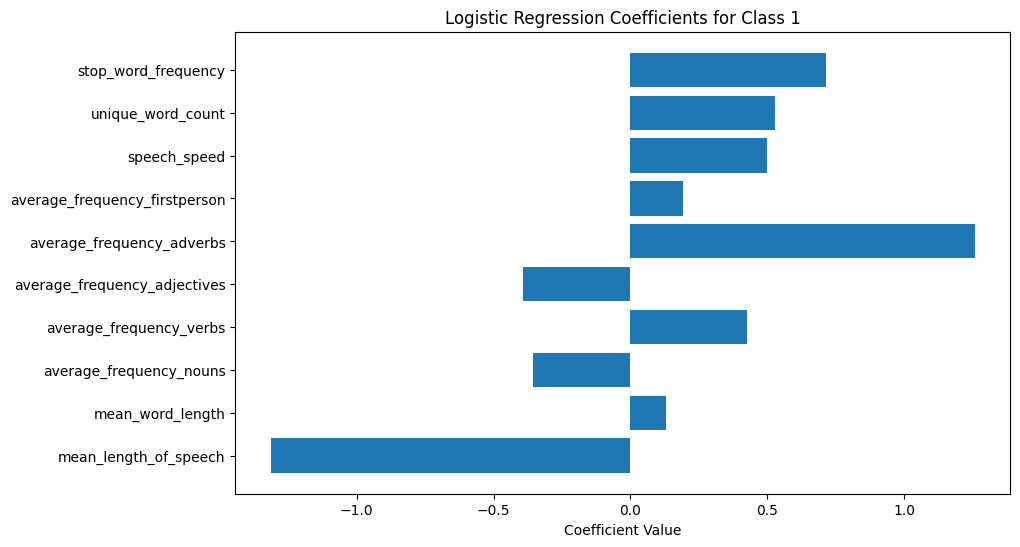

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

model.fit(X_train_norm, y_train)

# Get coefficients: class 1
coefficients_class_1 = model.coef_[0]
features = ["mean_length_of_speech",	"mean_word_length",	"average_frequency_nouns",	"average_frequency_verbs",	"average_frequency_adjectives",	"average_frequency_adverbs",	"average_frequency_firstperson",	"speech_speed",	"unique_word_count",	"stop_word_frequency"]

print(f'Intercept: {model.intercept_}') # log odds of positive class when all features are set to zero, This means that with no information from the features (i.e., when all feature values are zero), the model predicts a probability of this value for the positive class
print(f'Coefficients: {model.coef_}')

#the model is predicting that class 1 is less likely than class 0 when there is no information

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients_class_1)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients for Class 1')
plt.show()

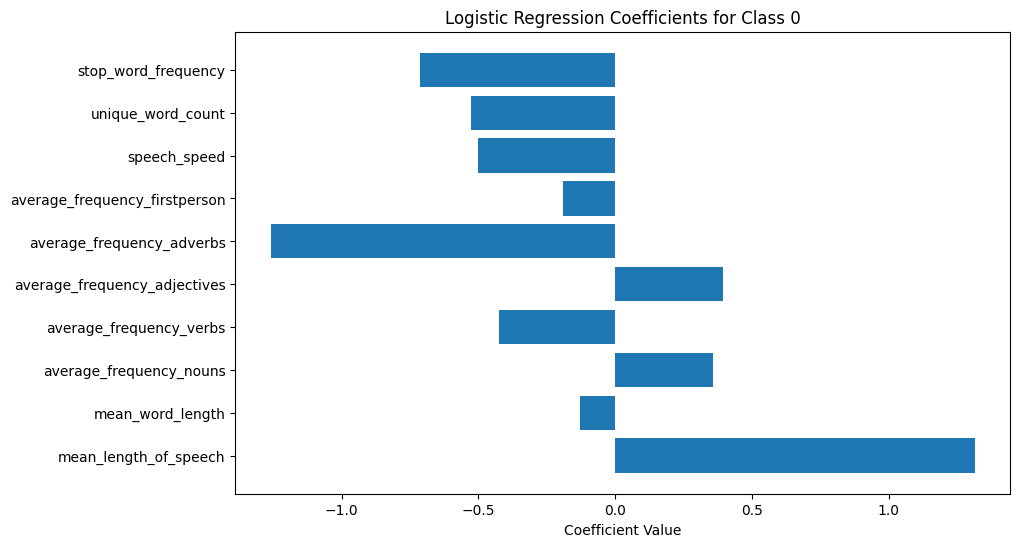

In [54]:
model.fit(X_train_norm, y_train)

# Get coefficients for class 0 (negative class)
coefficients_class_0 = -coefficients_class_1

# Features
features = ["mean_length_of_speech", "mean_word_length", "average_frequency_nouns", 
            "average_frequency_verbs", "average_frequency_adjectives", 
            "average_frequency_adverbs", "average_frequency_firstperson", 
            "speech_speed", "unique_word_count", "stop_word_frequency"]

# Plot the coefficients for class 0
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients_class_0)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients for Class 0')
plt.show()

Predicted Probabilities for Class 1 (Positive Class):
[0.43602462 0.37390215 0.54050314 0.44958103 0.46944416]


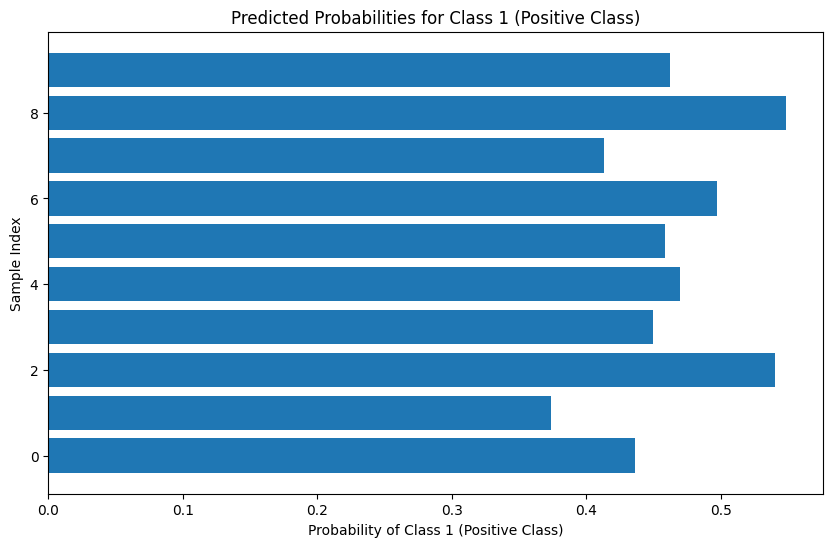

In [51]:
model.fit(X_train_norm, y_train)

# Predict probabilities for class 0 and class 1
probabilities = model.predict_proba(X_test_norm)

# probabilities is a 2D array: each row corresponds to an observation
# probabilities[:, 0] is the probability of class 0 (negative class)
# probabilities[:, 1] is the probability of class 1 (positive class)

# For example, to get the probabilities of class 1 (positive class):
prob_class_1 = probabilities[:, 1]

# Example: print the predicted probabilities for the first 5 samples
print("Predicted Probabilities for Class 1 (Positive Class):")
print(prob_class_1[:5])

# Example: Plot the probabilities for the first 10 samples
plt.figure(figsize=(10, 6))
plt.barh(range(10), prob_class_1[:10])
plt.xlabel('Probability of Class 1 (Positive Class)')
plt.ylabel('Sample Index')
plt.title('Predicted Probabilities for Class 1 (Positive Class)')
plt.show()

In [52]:
import sklearn
print(sklearn.__version__)

1.5.2


In [56]:
# Take a single test sample
single_input = X_test_norm[0]
print(f'Input features: {single_input}')

# Calculate log-odds (z) and probability
z = model.intercept_ + np.dot(single_input, model.coef_.T)
probability = 1 / (1 + np.exp(-z))

# Print the log-odds and probability
print(f'Log-odds (z): {z}')
print(f'Predicted probability (p): {probability}')

# Calculate contributions of each feature
contributions = model.coef_[0] * single_input
print(f'Contributions from each feature: {contributions}')

# Sum of contributions
total_contribution = np.sum(contributions) + model.intercept_
print(f'Total contribution to log-odds: {total_contribution}')

Input features: [0.17507236 0.44866398 0.6040613  0.40635113 0.17741846 0.23485304
 0.52346953 0.73517905 0.34993084 0.1592406 ]
Log-odds (z): [-0.25731189]
Predicted probability (p): [0.43602462]
Contributions from each feature: [-0.23020006  0.05811089 -0.21599656  0.17227455 -0.06973738  0.29571468
  0.09986053  0.36786644  0.18453271  0.11355908]
Total contribution to log-odds: [-0.25731189]


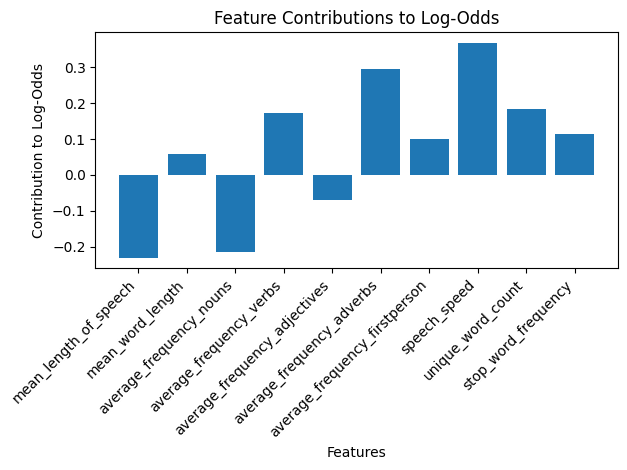

In [59]:
# Bar plot to visualize feature contributions
plt.bar(range(len(contributions)), contributions, tick_label=features)

# Customize the plot
plt.title('Feature Contributions to Log-Odds')
plt.xlabel('Features')
plt.ylabel('Contribution to Log-Odds')
plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [60]:
# Take a single test sample
single_input = X_test_norm[5]
print(f'Input features: {single_input}')

# Calculate log-odds (z) and probability
z = model.intercept_ + np.dot(single_input, model.coef_.T)
probability = 1 / (1 + np.exp(-z))

# Print the log-odds and probability
print(f'Log-odds (z): {z}')
print(f'Predicted probability (p): {probability}')

# Calculate contributions of each feature
contributions = model.coef_[0] * single_input
print(f'Contributions from each feature: {contributions}')

# Sum of contributions
total_contribution = np.sum(contributions) + model.intercept_
print(f'Total contribution to log-odds: {total_contribution}')

Input features: [0.10216721 0.26758167 0.56731874 0.13745424 0.51338435 0.33008516
 0.44552067 0.73717749 0.47026279 0.27353739]
Log-odds (z): [-0.16681741]
Predicted probability (p): [0.45839209]
Contributions from each feature: [-0.13433815  0.03465714 -0.20285838  0.0582744  -0.20179457  0.41562598
  0.08499049  0.36886641  0.24798862  0.19506742]
Total contribution to log-odds: [-0.16681741]


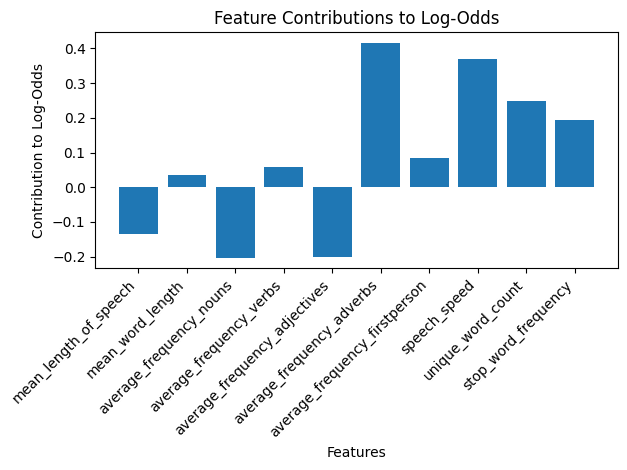

In [61]:
# Bar plot to visualize feature contributions
plt.bar(range(len(contributions)), contributions, tick_label=features)

# Customize the plot
plt.title('Feature Contributions to Log-Odds')
plt.xlabel('Features')
plt.ylabel('Contribution to Log-Odds')
plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()